In [1]:
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [2]:
# Functions for custom normalization of colorbar
import matplotlib

def _forward(x):
    return np.sqrt(x)

def _inverse(x):
    return x**2

norm = matplotlib.colors.FuncNorm((_forward, _inverse), vmin=0, vmax=35)

In [2]:
# Dictionary to group areas
myDict = {}
myDict.update(dict.fromkeys(['1,2,3', '5', '31', '40', '43'], 'Somatosensory'))
myDict.update(dict.fromkeys(['4', '6', '8', '32'], 'Motor'))
myDict.update(dict.fromkeys(['9', '10', '24', '44', '45', '46'], 'Executive'))
myDict.update(dict.fromkeys(['11', '13', '25', '38', '47'], 'Emotional'))
myDict.update(dict.fromkeys(['16'], 'Insular'))
myDict.update(dict.fromkeys(['7', '39'], 'Attention'))
myDict.update(dict.fromkeys(['20', '21', '23', '27', '28', '35,36', '37'], 'Memory'))
myDict.update(dict.fromkeys(['17', '18', '19'], 'Visual'))
myDict.update(dict.fromkeys(['34'], 'Olfactory'))
myDict.update(dict.fromkeys(['22','41,42,52'], 'Sound'))
myDict.update(dict.fromkeys(['26,29,30','33'], 'Attention'))
myDict.update(dict.fromkeys(['Accumbens','Amygdala','Cerebellum','Hippocampus','Pallidum','Putamen','Thalamus'], 'Subcortex'))

In [3]:
### Brodmann areas in rearranged order
# Read data
#path='/mnt/data/2020_Projects/2025_MDD/03_Data/data4analysis/'
path = "C:\\Users\Alba Segura Amil\OneDrive - Universitaet Bern\\00_WORK\\2025_DBSinDepression\plots\data4analysis\\"
#path='/Users/alba/Documents/MDD_Bern/data4analysis/'
df1 = pd.read_csv(path + 'data4heatmap1.csv') #patient1
df2 = pd.read_csv(path + 'data4heatmap2.csv') #patient2
df3 = pd.read_csv(path + 'data4heatmap3.csv') #patient3

# Merge some areas
df_list = [df1, df2, df3]
for df in df_list:
    df['BA1_2_3'] = df['BA1_3'] + df['BA2']
    df.drop(['BA1_3', 'BA2'], axis=1, inplace=True)

# Reindex column names
column_names = [
    'BA7','BA39',
    'BA11','BA13','BA25','BA38','BA47',
    'BA9','BA10','BA24','BA44','BA45','BA46',
    'BA16',
    'BA20','BA21','BA23','BA27','BA28','BA35_36','BA37',
    'BA4','BA6','BA8','BA32',
    'BA34',
    'BA1_2_3','BA5','BA31','BA40','BA43',
    'BA22','BA41_42_52',
    'BA17','BA18','BA19',
    'BA26_29_30','BA33',
    'Accumbens','Amygdala','Cerebellum','Hippocampus','Pallidum','Putamen','Thalamus',
    'BARS','Sheehan', 'SHAPS', 'MADRS', 'HAMD', 'BDI', 'SOFAS', 'date']

In [4]:
df1 = df1.reindex(columns=column_names)
df2 = df2.reindex(columns=column_names)
df3 = df3.reindex(columns=column_names)

# Rename columns
df1.columns = df1.columns.str.replace('BA', '')
df2.columns = df2.columns.str.replace('BA', '')
df3.columns = df3.columns.str.replace('BA', '')

df1.columns = df1.columns.str.replace('_', ',')
df2.columns = df2.columns.str.replace('_', ',')
df3.columns = df3.columns.str.replace('_', ',')

df1.rename(columns = {'RS':'BARS'}, inplace = True)
df2.rename(columns = {'RS':'BARS'}, inplace = True)
df3.rename(columns = {'RS':'BARS'}, inplace = True)

# to sort by date
df1['datetime']=pd.to_datetime(df1['date'], dayfirst=True).dt.date
df2['datetime']=pd.to_datetime(df2['date'], dayfirst=True).dt.date
df3['datetime']=pd.to_datetime(df3['date'], dayfirst=True).dt.date

df1 = df1.drop(['date'], axis=1)
df2 = df2.drop(['date'], axis=1)
df3 = df3.drop(['date'], axis=1)

## Individual scales (improvement)

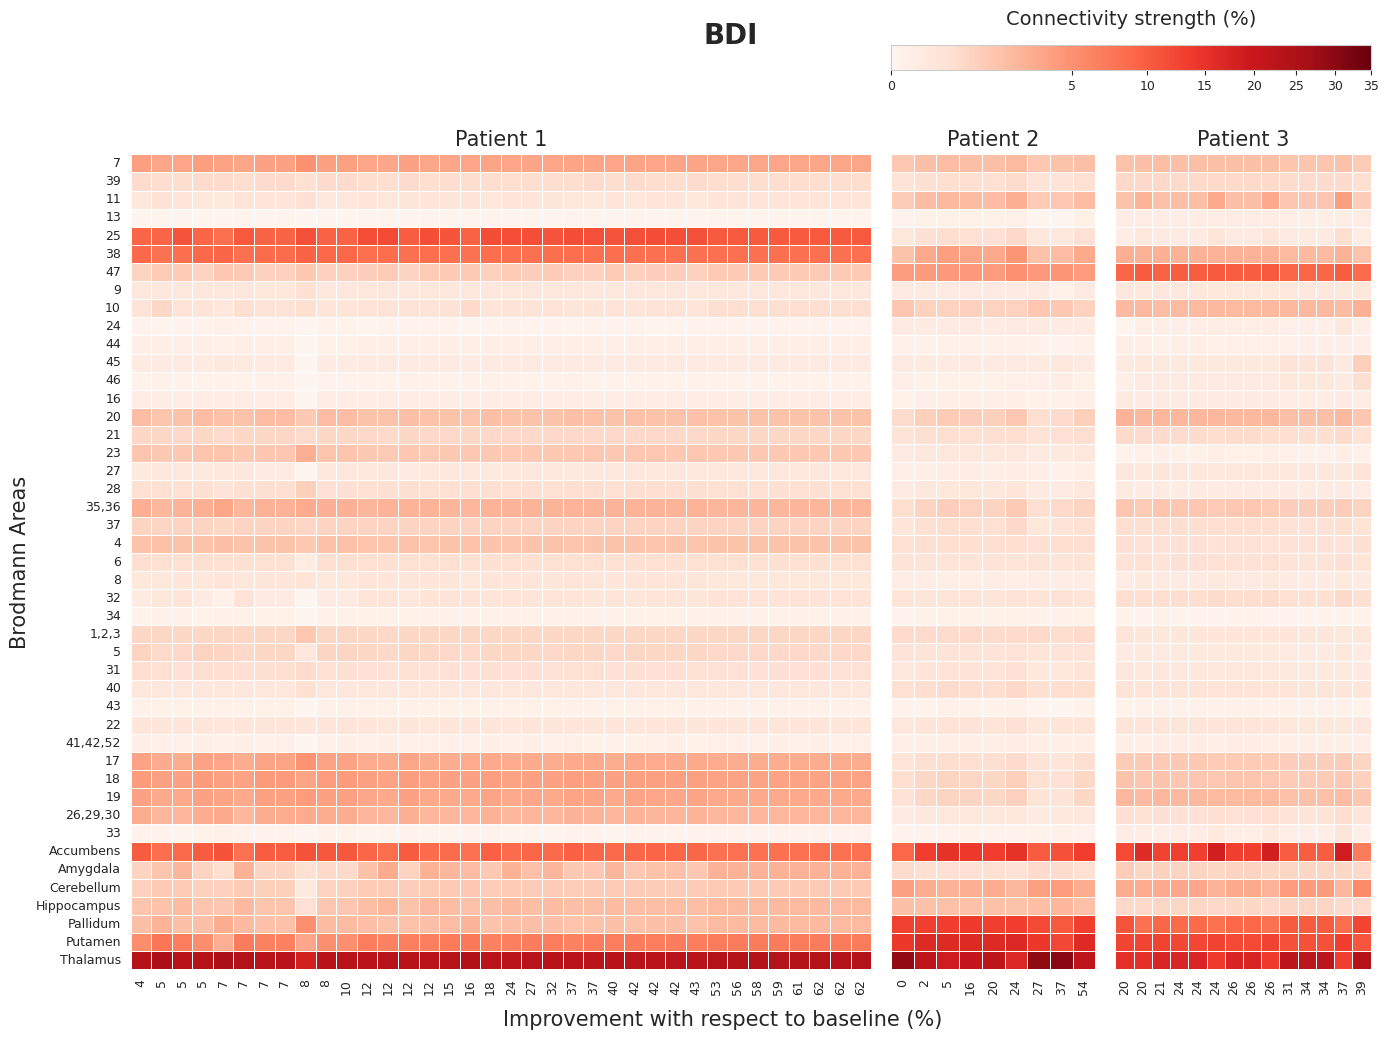

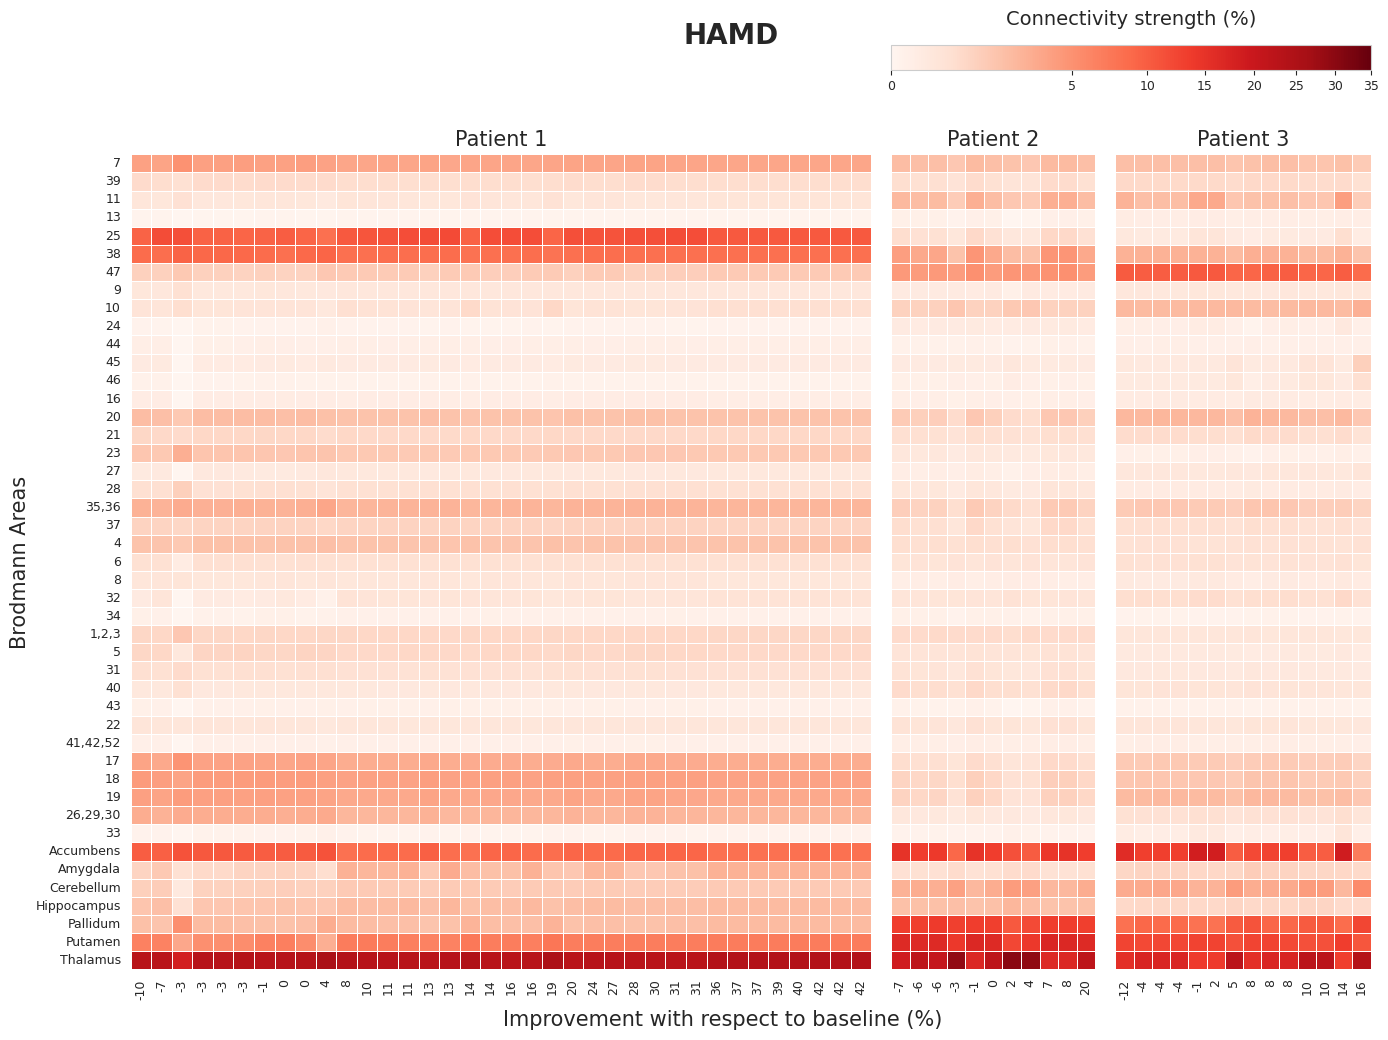

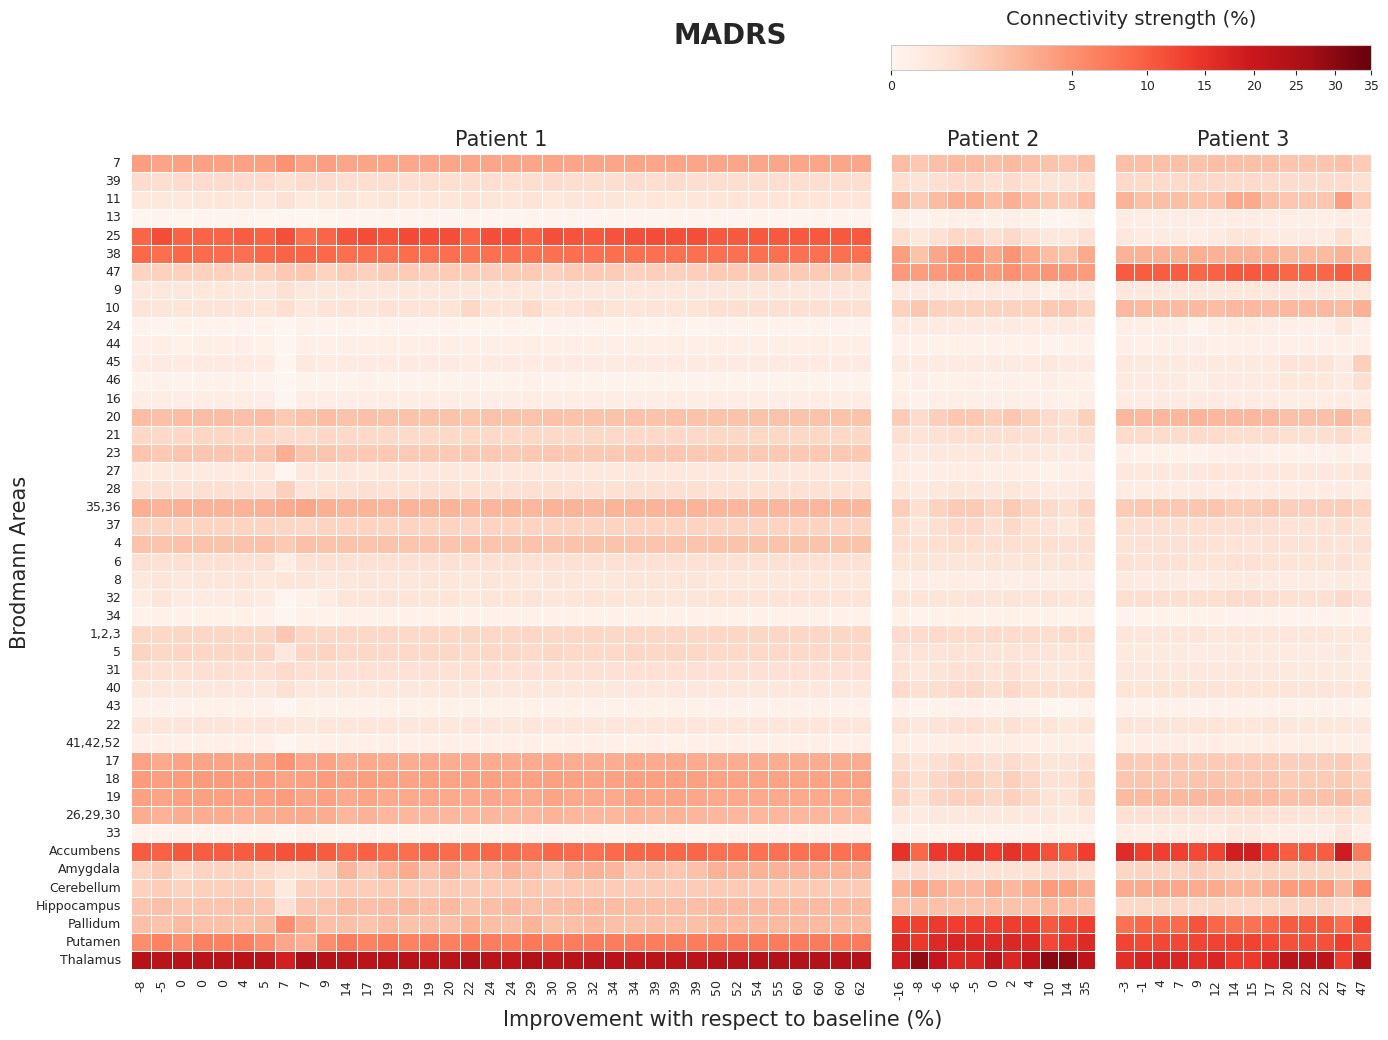

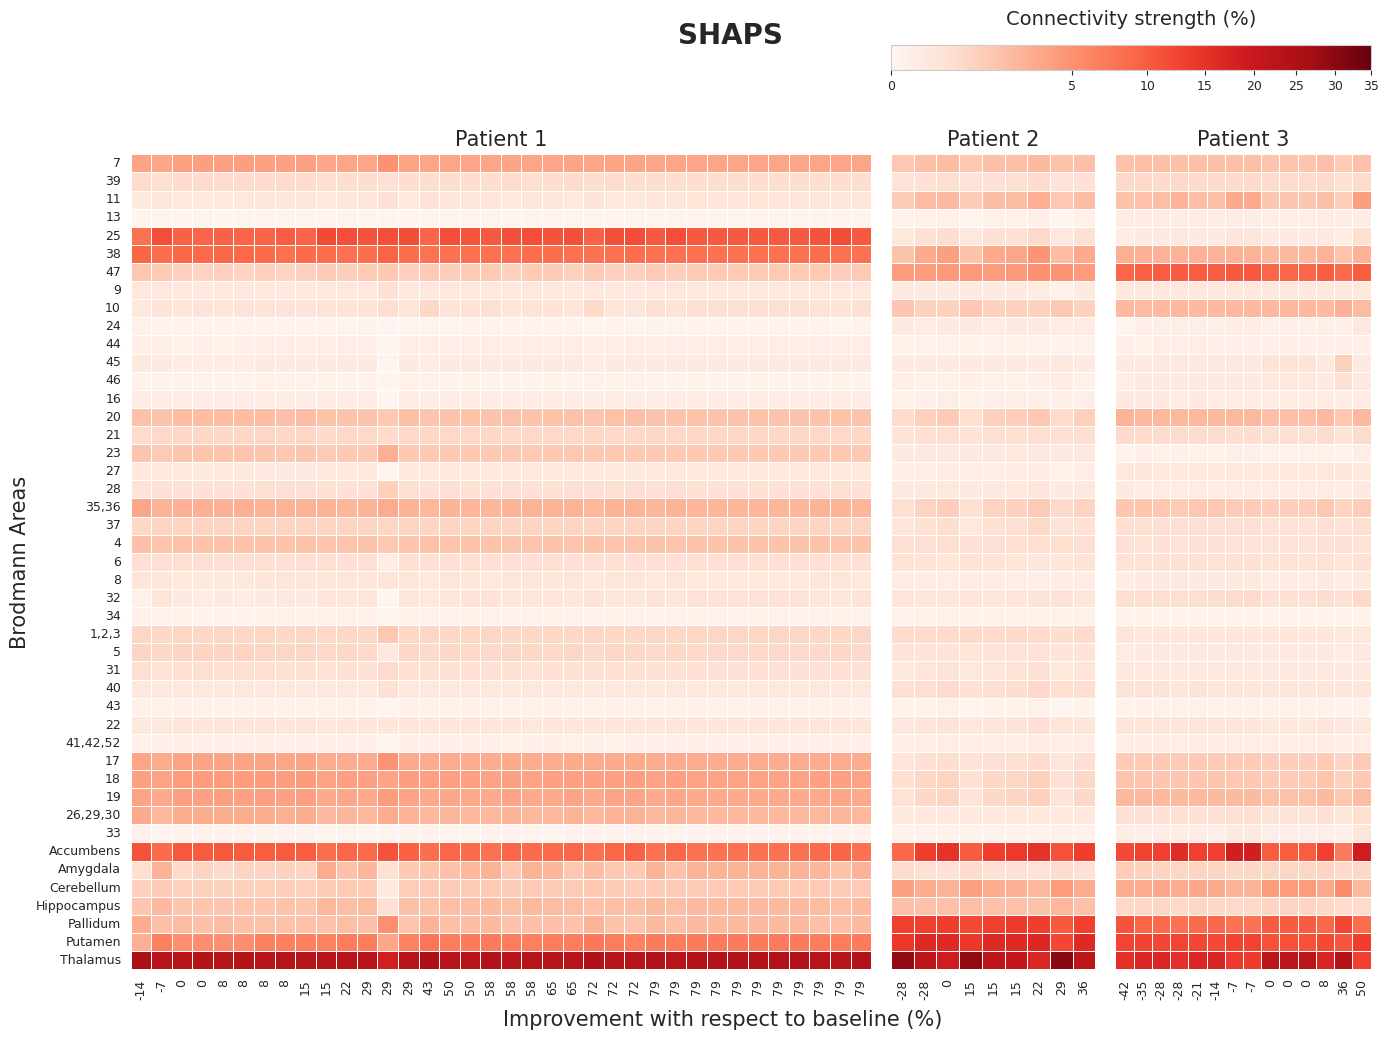

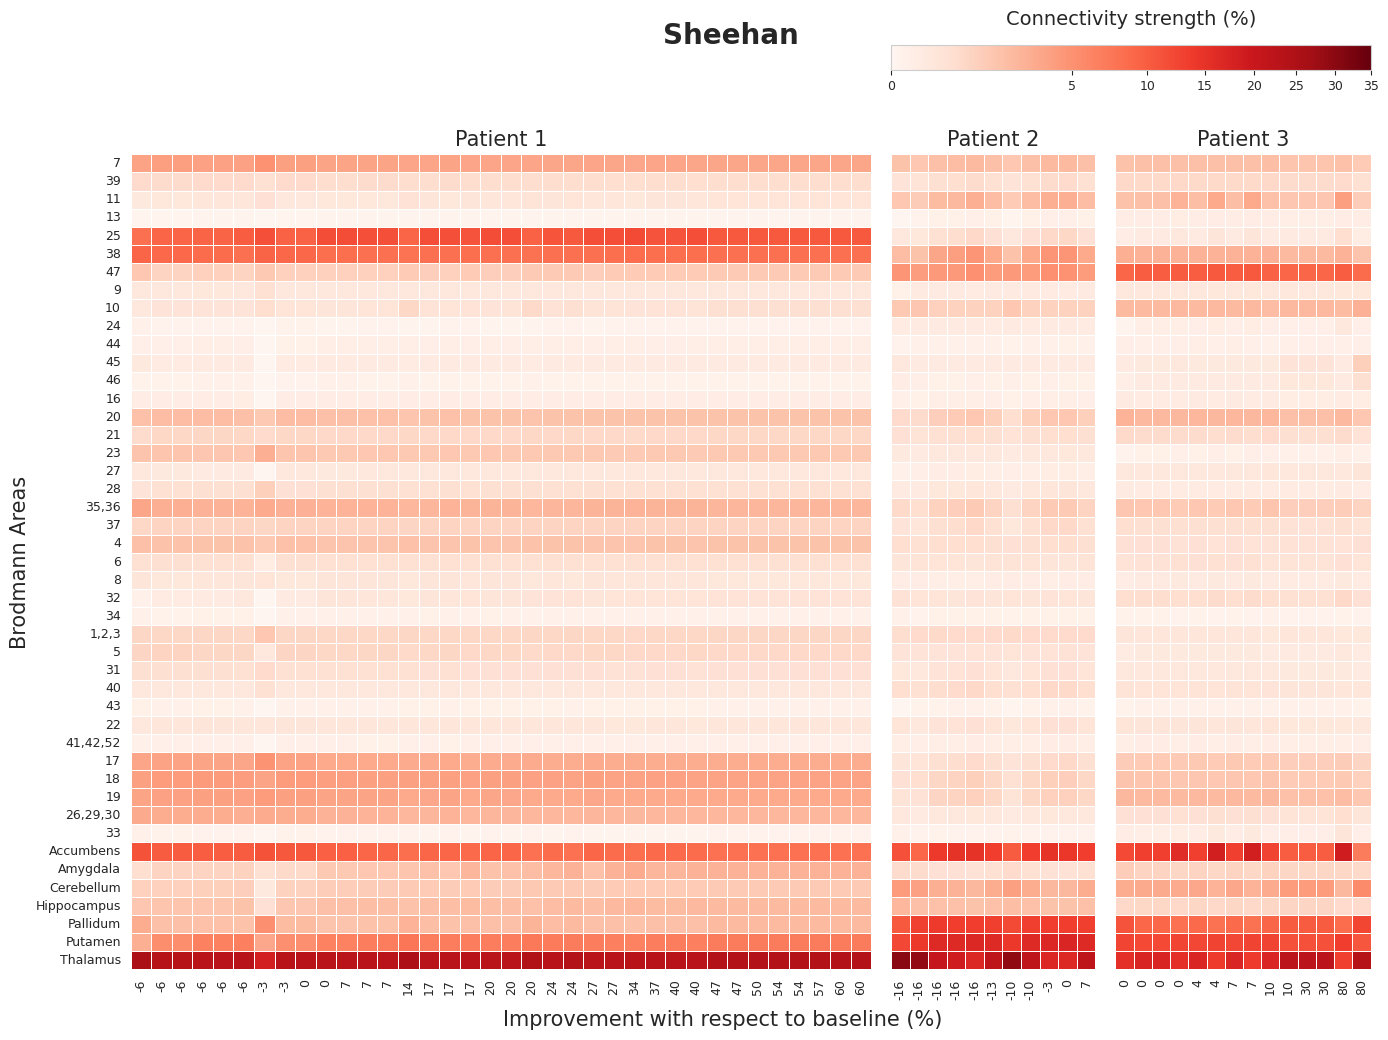

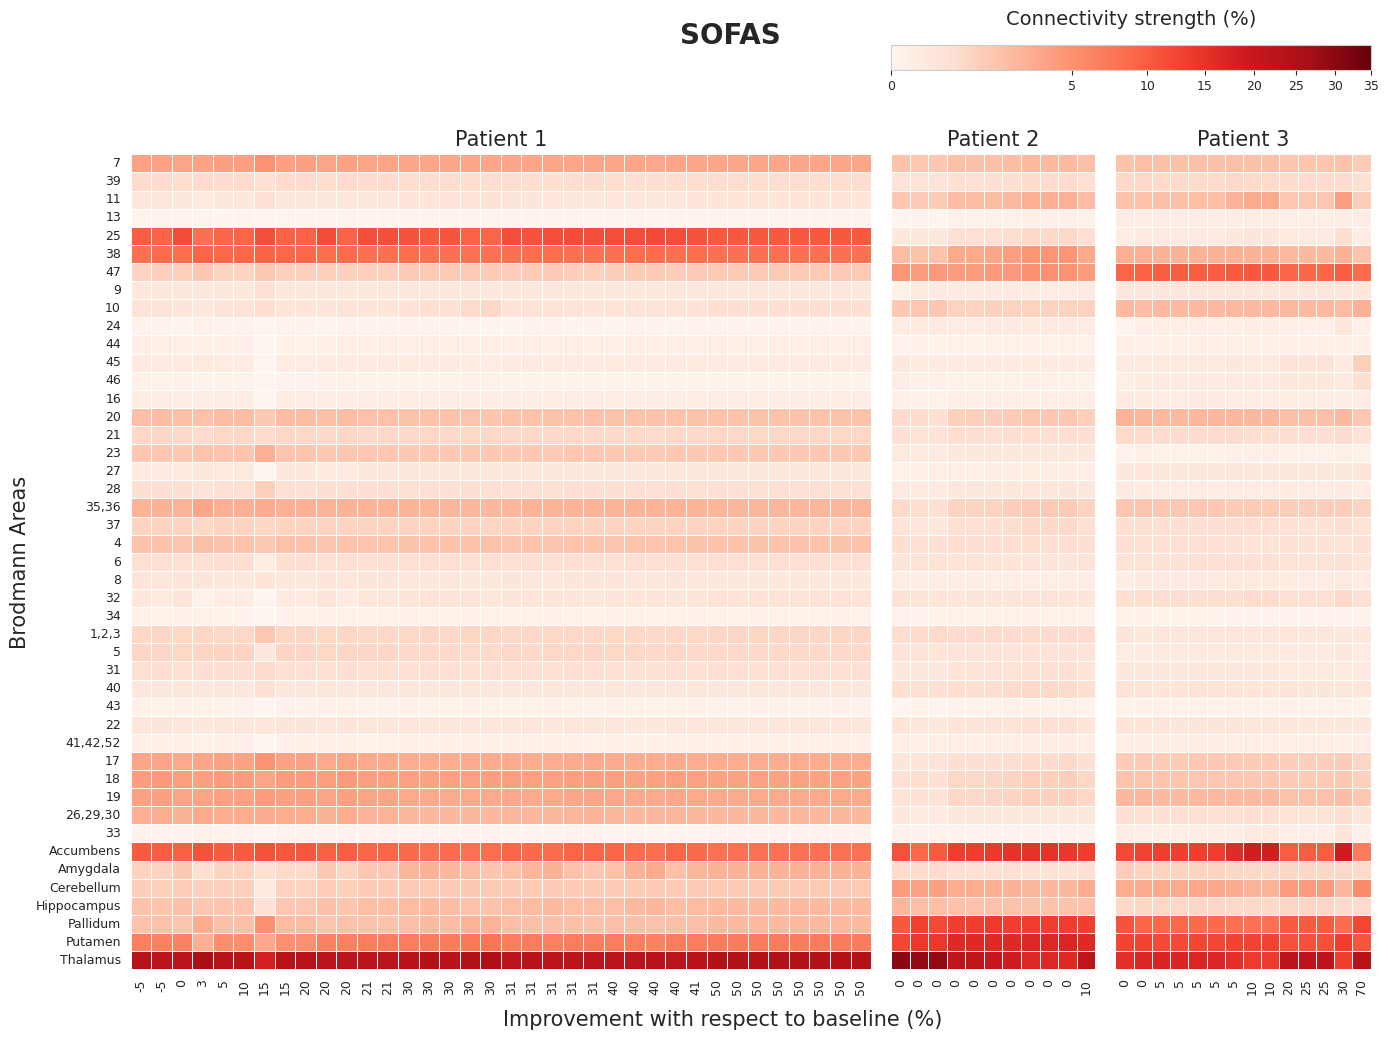

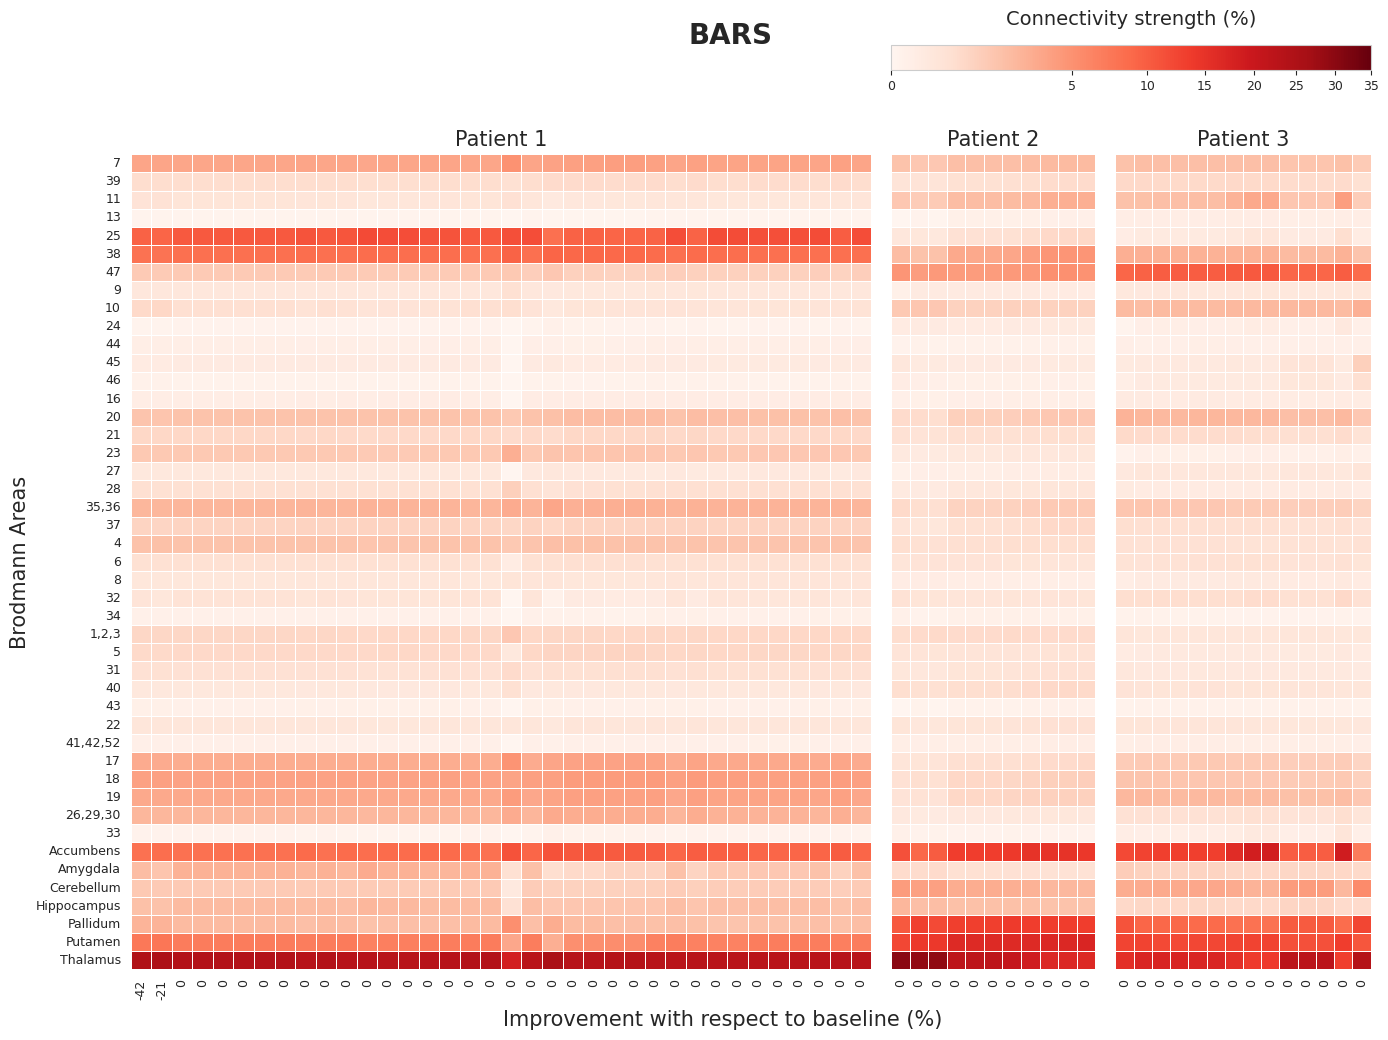

In [6]:
assessment_list = ['BDI', 'HAMD', 'MADRS', 'SHAPS', 'Sheehan', 'SOFAS', 'BARS']
#assessment_list= ['SHAPS']
cmap4='Reds'

for measure in assessment_list:
    selection1 = df1[[c for c in df1.columns if c not in assessment_list + ['datetime']] + [measure]].dropna()
    selection2 = df2[[c for c in df2.columns if c not in assessment_list + ['datetime']] + [measure]].dropna()
    selection3 = df3[[c for c in df3.columns if c not in assessment_list + ['datetime']] + [measure]].dropna()

    selection1[measure] = selection1[measure].apply(np.ceil).astype(np.int64)
    selection2[measure] = selection2[measure].apply(np.ceil).astype(np.int64)
    selection3[measure] = selection3[measure].apply(np.ceil).astype(np.int64)

    to_plot_df1 = selection1.sort_values(by=measure,ascending=True).set_index(measure)
    to_plot_df2 = selection2.sort_values(by=measure,ascending=True).set_index(measure)
    to_plot_df3 = selection3.sort_values(by=measure,ascending=True).set_index(measure)

    # initialize a plot-grid with 4 axes (3 plots and 1 colorbar)
    plt.rc('font', size=9)
    fig = plt.figure(figsize=(16, 12))
    gs = GridSpec(2, 3, height_ratios=[0.8, 26], width_ratios=[2.9, 0.8, 1], hspace=0.2, wspace=0.05)

    ax1 = plt.subplot(gs[1,0])
    ax2 = plt.subplot(gs[1,1])
    ax3 = plt.subplot(gs[1,2])
    ax4 = plt.subplot(gs[0,1:])

    ax1.set_title('Patient 1', fontsize=15)
    ax2.set_title('Patient 2', fontsize=15)
    ax3.set_title('Patient 3', fontsize=15)

    sns.heatmap(to_plot_df1.transpose(), linewidths=.5, ax=ax1, cmap=cmap4, norm=norm, cbar=False)
    sns.heatmap(to_plot_df2.transpose(), linewidths=.5, ax=ax2, cmap=cmap4, norm=norm, cbar=False)
    sns.heatmap(to_plot_df3.transpose(), linewidths=.5, ax=ax3, cmap=cmap4, norm=norm, cbar=False)

    cb1 = matplotlib.colorbar.ColorbarBase(ax=ax4, cmap=cmap4, norm=norm, orientation='horizontal')
    cb1.set_label('Connectivity strength (%)', fontsize=14, labelpad=-60,  y=0.45)

    #ax4.xaxis.set_label_coords(.8, -.1)

    # labels
    ax1.set_xlabel('Improvement with respect to baseline (%)', fontsize=15)
    ax1.xaxis.set_label_coords(.8, -0.05)
    ax1.set_ylabel('Brodmann Areas', fontsize=15)
    ax1.set(xticklabels=to_plot_df1.index.values.round(0))

    #ax2.set_xlabel('Improvement with respect to baseline (%)', fontsize=15, labelpad=10)
    ax2.set(xlabel='', ylabel='', yticklabels='', xticklabels=to_plot_df2.index.values.round(0))

    #ax3.set_xlabel('Improvement with respect to baseline (%)', fontsize=15, labelpad=10)
    ax3.set(xlabel='', ylabel='', yticklabels='', xticklabels=to_plot_df3.index.values.round(0))

    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)

    for tick in ax2.get_xticklabels():
        tick.set_rotation(90)

    for tick in ax3.get_xticklabels():
        tick.set_rotation(90)

    plt.suptitle(measure, fontsize=20, fontweight="bold", x=0.5, y=0.9)

    #plt.savefig('data4analysis/plots/measures/'+measure+'.png', dpi=300, bbox_inches='tight')
    plt.show()

## Time + Assessment scales

In [6]:
# Plot with time 2 heatmaps
assessment_list = ['BDI', 'HAMD', 'MADRS', 'SHAPS', 'Sheehan', 'SOFAS', 'BARS']
assessment_list2 = ['HAMD', 'MADRS', 'SHAPS', 'SOFAS']
#assessment_list_t = ['BDI', 'HAMD', 'MADRS', 'SHAPS', 'Sheehan', 'SOFAS', 'BARS','datetime']

df1 = df1.sort_values(by=['datetime'],ascending=True).reset_index(drop=True)
df2 = df2.sort_values(by=['datetime'],ascending=True).reset_index(drop=True)
df3 = df3.sort_values(by=['datetime'],ascending=True).reset_index(drop=True)

In [7]:
selection11 = df1[[c for c in df1.columns if c not in assessment_list  + ['datetime']]]
selection12 = df2[[c for c in df2.columns if c not in assessment_list + ['datetime']]]
selection13 = df3[[c for c in df3.columns if c not in assessment_list + ['datetime']]]

selection21 = df1[[c for c in df1.columns if c in assessment_list2 ]]
selection22 = df2[[c for c in df2.columns if c in assessment_list2 ]]
selection23 = df3[[c for c in df3.columns if c in assessment_list2 ]]

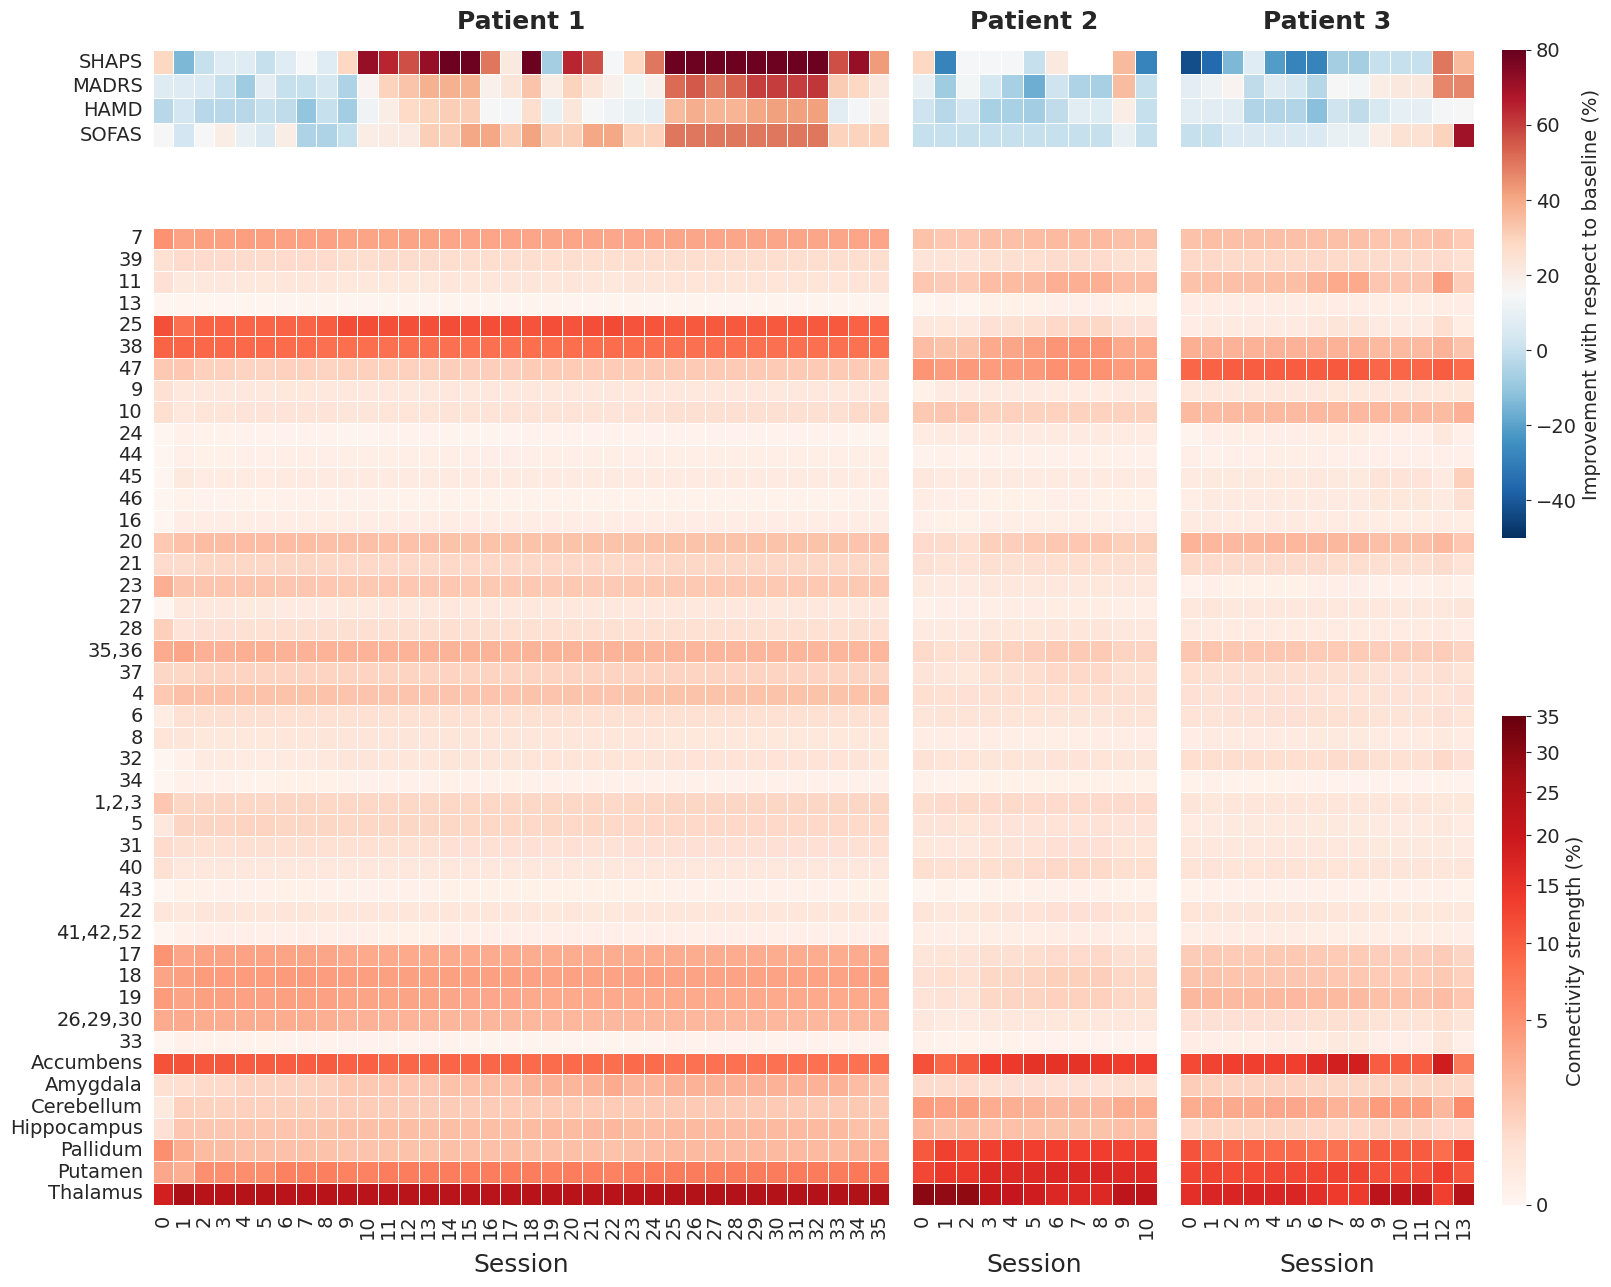

In [8]:
#inverse plot
# initialize a plot-grid with 4 axes (3 plots and 1 colorbar)
cmap='RdBu_r'
cmap4='Reds'
norm_ev = matplotlib.colors.Normalize(vmin=-50, vmax=80)

plt.rc('font', size=14)
fig = plt.figure(figsize=(18, 15))
gs = GridSpec(2, 3, height_ratios=[0.4, 4], width_ratios=[3, 1, 1.5], hspace=0.15, wspace=0.05)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
ax4 = plt.subplot(gs[1,0])
ax5 = plt.subplot(gs[1,1])
ax6 = plt.subplot(gs[1,2])

ax1.set_title('Patient 1', fontsize=18, fontweight='bold', pad=15)
ax2.set_title('Patient 2', fontsize=18, fontweight='bold', pad=15)
ax3.set_title('Patient 3', fontsize=18, fontweight='bold', pad=15)

# Plot connectivity profiles
sns.heatmap(selection11.transpose(), linewidths=.5, ax=ax4, cmap=cmap4, norm=norm, cbar=False)
sns.heatmap(selection12.transpose(), linewidths=.5, ax=ax5, cmap=cmap4, norm=norm, cbar=False)
sns.heatmap(selection13.transpose(), linewidths=.5, ax=ax6, cmap=cmap4, norm=norm,
            cbar_kws={'label': 'Connectivity strength (%)', 'shrink': 0.5, 'anchor':(0.3,0)})

# Plot clinical assessments
sns.heatmap(selection21.transpose(), linewidths=.5, ax=ax1, cmap=cmap, norm=norm_ev, cbar=False)
sns.heatmap(selection22.transpose(), linewidths=.5, ax=ax2, cmap=cmap, norm=norm_ev, cbar=False)
sns.heatmap(selection23.transpose(), linewidths=.5, ax=ax3, cmap=cmap, norm=norm_ev,
            cbar_kws={'label': 'Improvement with respect to baseline (%)', 'shrink': 5, 'anchor':(0.3,1)})

# labels
#ax4.set_ylabel('Parcellation areas', fontsize=18, labelpad=-20)
ax1.set(xlabel='', xticklabels='')
ax2.set(xlabel='', xticklabels='', yticklabels='')
ax3.set(xlabel='', xticklabels='', yticklabels='')

#ax1.set_ylabel('Assessments', fontsize=18, labelpad=20)
ax4.set_xlabel('Session', fontsize=18, labelpad=10)
ax5.set(yticklabels='')
ax5.set_xlabel('Session', fontsize=18, labelpad=10)
ax6.set(yticklabels='')
ax6.set_xlabel('Session', fontsize=18, labelpad=10)


for tick in ax4.get_xticklabels():
    tick.set_rotation(90)

for tick in ax5.get_xticklabels():
    tick.set_rotation(90)

for tick in ax6.get_xticklabels():
    tick.set_rotation(90)

plt.savefig('data4analysis/plots/connectivity_scales_inverse_noorder_noylabel_extraspace.png', dpi=300, bbox_inches='tight')

plt.show()

## Spearman correlation

In [5]:
# Data to plot
df1 = df1.drop(['BARS','Sheehan','BDI'], axis=1)
df2 = df2.drop(['BARS','Sheehan','BDI'], axis=1)
df3 = df3.drop(['BARS','Sheehan','BDI'], axis=1)

In [9]:
# To calculate correlation and p-value matrix
# df: dataframe containing data
# correlationtype: correlation function to use ( pearsonr // spearmanr)

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.stats.multitest import multipletests

def get_correlation(df, correlationtype):
    df=df.dropna()
    df_corr = pd.DataFrame()
    df_p = pd.DataFrame()

    #for x in df.columns[0:46]:
     #   for y in df.columns[46:50]:
    for x in df.columns[0:45]: ## if grouping BA 123 into one
        for y in df.columns[45:49]:
            corr = correlationtype(df[x], df[y])
            df_corr.loc[x,y] = corr[0]
            df_p.loc[x,y] = corr[1]

    shape = df_p.values.shape
    significant_p = multipletests(df_p.values.flatten(), alpha=0.05, method='fdr_bh')[0].reshape(shape)
    corrected_p = multipletests(df_p.values.flatten(), alpha=0.05, method='fdr_bh')[1].reshape(shape)

    return df_corr, df_p, significant_p, corrected_p

In [10]:
### Function to tranform array with True/False cells into * (if cell==True)
# significant_p: array containing True/False cells
# stars: array containing *

def annot_star(significant_p):
    shape = significant_p.shape
    stars = np.array(['*' if val else '' for val in significant_p.flatten()]).reshape(shape)
    return stars

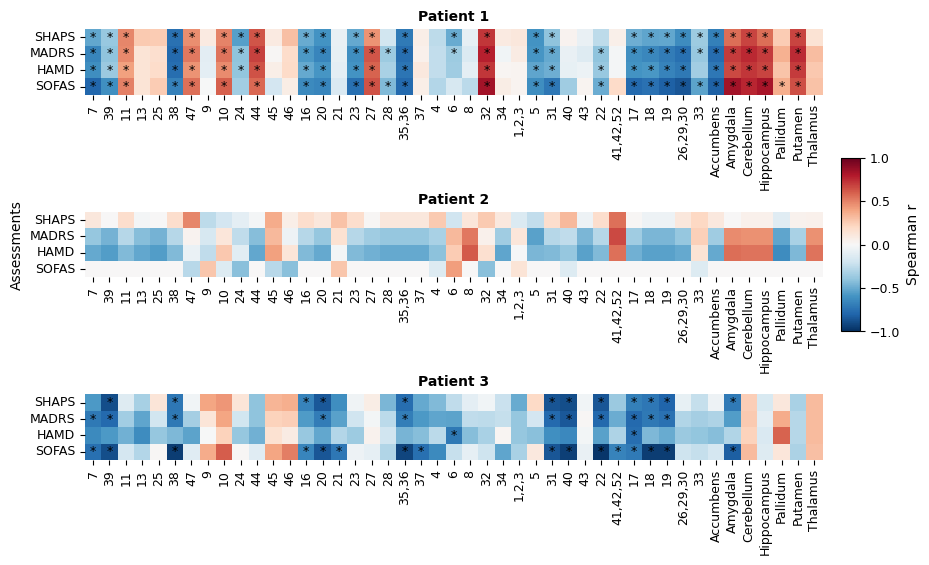

In [11]:
# With FDR correction and asterisk
cmap='RdBu_r'
norm_sp = matplotlib.colors.Normalize(vmin=-1, vmax=1)

# initialize a plot-grid with 3 axes
plt.rc('font', size=9)
fig = plt.figure(figsize=(10, 7))
gs = GridSpec(3, 2, width_ratios=[40, 1], hspace=0.05, wspace=0.05)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[2,0])
ax4 = plt.subplot(gs[1,1])

ax1.set_title('Patient 1', fontsize=10, fontweight="bold")
ax2.set_title('Patient 2', fontsize=10, fontweight="bold")
ax3.set_title('Patient 3', fontsize=10, fontweight="bold")

# Patient1
[df_corr_1, df_p_1, significant_p_1, corrected_p_1] = get_correlation(df1, spearmanr)
stars_p1 = annot_star(significant_p_1)
sns.heatmap(df_corr_1.transpose(), square=True, cmap=cmap, norm=norm_sp, ax=ax1, cbar=False, annot=stars_p1.transpose(), fmt = '', annot_kws={'color':'k'})

# Patient 2
[df_corr_2, df_p_2, significant_p_2, corrected_p_2] = get_correlation(df2, spearmanr)
stars_p2 = annot_star(significant_p_2)
sns.heatmap(df_corr_2.transpose(), square=True, cmap=cmap,norm=norm_sp, ax=ax2, cbar=False, annot=stars_p2.transpose(), fmt = '', annot_kws={'color':'k'})

# Patient 3
[df_corr_3, df_p_3, significant_p_3, corrected_p_3] = get_correlation(df3, spearmanr)
stars_p3 = annot_star(significant_p_3)
sns.heatmap(df_corr_3.transpose(), square=True, cmap=cmap,norm=norm_sp, ax=ax3, cbar=False, annot=stars_p3.transpose(), fmt = '', annot_kws={'color':'k'})

# colorbar
cb1 = matplotlib.colorbar.ColorbarBase(ax=ax4, cmap=cmap,  norm=norm_sp)
cb1.set_label('Spearman r', fontsize=10)

# labels
ax2.set_ylabel('Assessments', fontsize=10)
#ax3.set_xlabel('Brodmann areas', fontsize=12, labelpad=10)

#plt.savefig('data4analysis/plots/spearman_FDR_stars.png', dpi=300, bbox_inches='tight')
plt.show()

## Median + IQR

In [10]:
#define function to calculate interquartile range
def find_iqr(x):
  median = np.median(x)
  iqr = np.subtract(*np.percentile(x, [75, 25]))
  iqr1 = np.percentile(x, [25])
  iqr3 = np.percentile(x, [75])
  return median, iqr, iqr1, iqr3

#calculate IQR for 'rating' and 'points' columns
#df[['rating', 'points']].apply(find_iqr)

#calculate IQR for all columns
median_iqr_11 = selection11.apply(find_iqr)
median_iqr_12 = selection12.apply(find_iqr)
median_iqr_13 = selection13.apply(find_iqr)

## Scatter plot correlations

In [ ]:
def data2plt_correlation(df):
    data = pd.DataFrame()
    for i in df.columns[45:49]: # indexes for columns containing the assessments
        df_ba = df.iloc[:, 0:45] # select columns corresponding to BAs
        df_ba['scale_value'] = df[i] # scales' values
        df_ba['scale'] = i # scales' names
        data = pd.concat([data, df_ba], axis=0, ignore_index=1)
    return data


In [ ]:
# Subplot with all areas
def plt_correlation(df):
    #df=df.dropna()
    plt.subplots(figsize=(20,40))
    count=1
    for x in df.columns[0:45]:
        plt.subplot(10,5,count)
        sns.scatterplot(data= df, x=df[x], y=df['scale_value'], hue=df['scale'])
        plt.ylabel('')
        plt.xlabel('')
        plt.title(x)
        count+=1
    plt.show()

In [7]:
data = data2plt_correlation(df1)
plt_correlation(data)

In [27]:
# Plot individual areas instead of subplot
dir_save = 'C:\\Users\\Alba Segura Amil\\OneDrive - Universitaet Bern\\00_WORK\\2025_DBSinDepression\\plots\\'

def plt_correlation_indiv(df):
    plt.rcParams['font.size'] = 12
    for x in df.columns[0:45]:
        fig = plt.figure(figsize=(2,2))
        g = sns.scatterplot(data=df, x=df[x], y='scale_value', hue='scale', legend=False)
        #plt.yticks(visible=False)
        plt.ylabel('')
        plt.xlabel('')
        plt.title(x)
        plt.savefig(dir_save + 'correlation\\' + '{}'.format(x) + '.png', dpi=300, bbox_inches='tight')
        fig.tight_layout()
        #plt.show()
        plt.close()

data = data2plt_correlation(df1)
plt_correlation_indiv(data)

C:\Users\Alba Segura Amil\AppData\Local\Temp\ipykernel_10540\1542505245.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


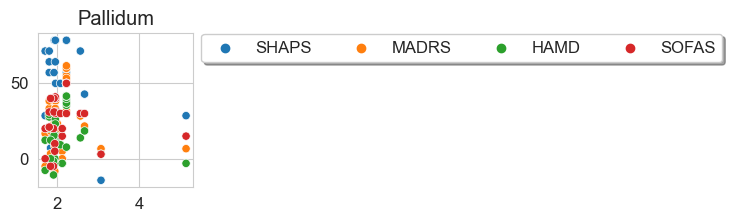

In [56]:
# Same plot as above but without the non-significant scales
# Pat 1
data = data2plt_correlation(df1)
area='Pallidum'
df = data[[area, 'scale_value', 'scale']]
#df = df.loc[df['scale'] != 'SOFAS'] # area 24
#df = df.loc[(df['scale'] != 'HAMD') & (df['scale'] != 'SHAPS')] # area 28
#df = df.loc[(df['scale'] != 'SOFAS') & (df['scale'] != 'HAMD')] # area 6
#df = df.loc[df['scale'] != 'HAMD'] # area 33
#df = df.loc[df['scale'] != 'SHAPS'] # area 22
#df = df.loc[(df['scale'] != 'SHAPS') & (df['scale'] != 'MADRS') & (df['scale'] != 'HAMD')] # Pallidum

plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(2,2))
g = sns.scatterplot(data=df, x=area, y='scale_value', hue='scale', legend=False,
                    palette=dict(SHAPS="#1f77b4", MADRS="#ff7f0e", HAMD="#2ca02c", SOFAS="#d62728"))
g.legend(loc='upper left', bbox_to_anchor=(1, 1.05),
          ncol=4, shadow=True)
plt.ylabel('')
plt.xlabel('')
plt.title(area)
plt.savefig(dir_save + 'correlation\\' + '{}'.format(area) + '.png', dpi=300, bbox_inches='tight')
#plt.savefig(dir_save + 'correlation\\legend.png', dpi=300, bbox_inches='tight') # to plot legend
fig.tight_layout()
plt.show()
plt.close()

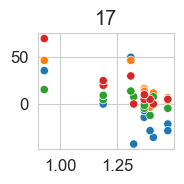

In [75]:
# Same plot as above but without the non-significant scales
# Pat 3
data = data2plt_correlation(df3)
area='17'
df = data[[area, 'scale_value', 'scale']] # 17 all
#df = df.loc[df['scale'] != 'HAMD'] # multiple areas
#df = df.loc[(df['scale'] != 'HAMD') & (df['scale'] != 'SHAPS')] # area 7
#df = df.loc[(df['scale'] != 'MADRS') & (df['scale'] != 'HAMD')] # area 16, amygdala
#df = df.loc[(df['scale'] != 'HAMD') & (df['scale'] != 'SHAPS') & (df['scale'] != 'MADRS')] # area 21, 37, 41,42
#df = df.loc[(df['scale'] != 'SOFAS') & (df['scale'] != 'SHAPS') & (df['scale'] != 'MADRS')] # area 6


plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(2,2))
g = sns.scatterplot(data=df, x=area, y='scale_value', hue='scale', legend=False,
                    palette=dict(SHAPS="#1f77b4", MADRS="#ff7f0e", HAMD="#2ca02c", SOFAS="#d62728"))

plt.ylabel('')
plt.xlabel('')
plt.title(area)
plt.savefig(dir_save + 'correlation_pat3\\' + '{}'.format(area) + '.png', dpi=300, bbox_inches='tight')
#plt.savefig(dir_save + 'correlation\\legend.png', dpi=300, bbox_inches='tight')
fig.tight_layout()
plt.show()
plt.close()